## **Supervised Learning**
## Project: `Finding Donors for CharityML`

- In this project, I will employ several `supervised algorithms` of My choice to accurately model individuals' income using data collected from the 1994 U.S.

- I will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data.

- **My goal** with this implementation is to construct a model that accurately predicts whether an individual makes more than **$50,000**.

- Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they 
should reach out to begin with.While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available featues. 

- The **dataset** for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income).

-------
## `Exploring the Data`


In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import sklearn
from time import time
from IPython.display import display 

# Import supplementary visualization code visuals.py
import visuals as vs
from visuals import distribution

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# display data 
display(data.head(5)) 


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### `Implementation: Data Exploration`
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than **\$50,000**. In the code cell below, you will need to compute the following:

- The total number of records, `n_records`.
- The number of individuals making more than \$50,000 annually, `n_greater_50k`.
- The number of individuals making at most \$50,000 annually, `n_at_most_50k`.
- The percentage of individuals making more than \$50,000 annually, `greater_percent`.

In [2]:
# Total number of records
n_records = data.shape[0]

# Number of records where individual's income is more than $50,000
n_greater_50k = (data['income'] == '<=50K').sum()

# Number of records where individual's income is at most $50,000
n_at_most_50k = (data['income'] == '>50K').sum()

# Percentage of individuals whose income is more than $50,000
greater_percent = int((n_greater_50k/n_records)*100)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 34014
Individuals making at most $50,000: 11208
Percentage of individuals making more than $50,000: 75%


### Information about data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [4]:
data.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### `Featureset Exploration`

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## `Preparing the Data(preprocessing)`
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

c:\Users\LENOVO\AMIT AI\Amit-1\myenv\Scripts\Machine learning\Mini_Project_2\P2\finding_donors\visuals.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


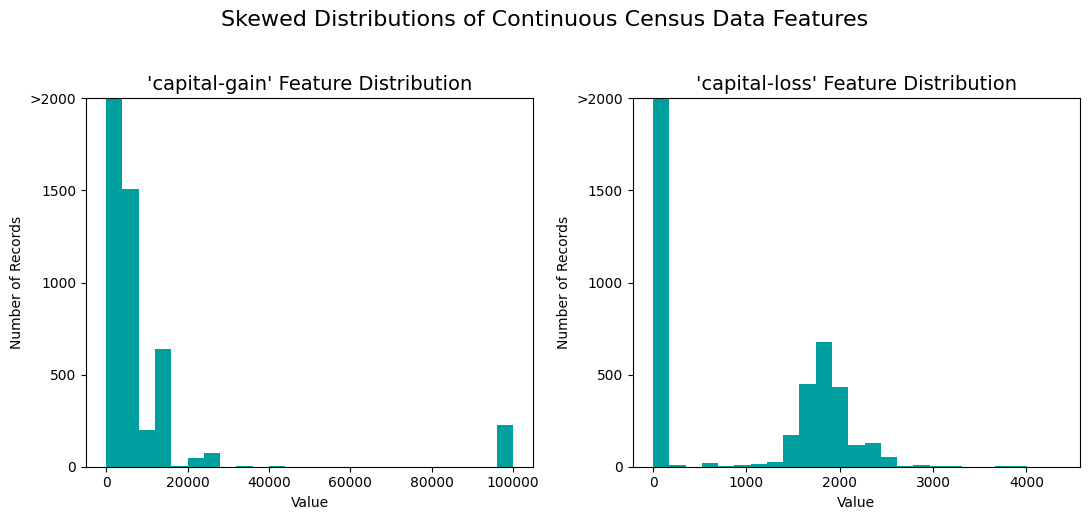

In [5]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

c:\Users\LENOVO\AMIT AI\Amit-1\myenv\Scripts\Machine learning\Mini_Project_2\P2\finding_donors\visuals.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


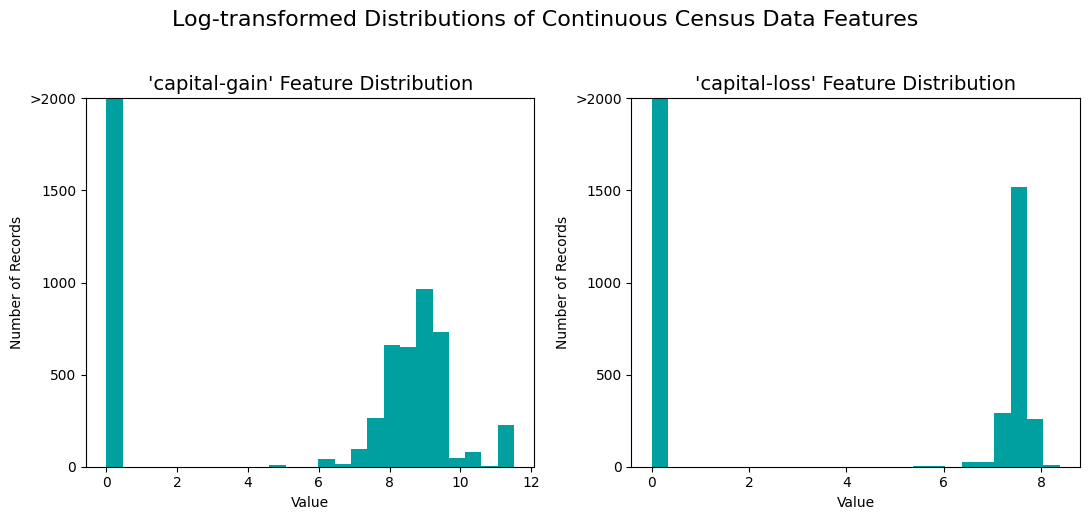

In [6]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

In [7]:
data.head(3)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K


In [8]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() 
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5)) 

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [9]:
# Check for missing values in the dataset
print(data.isnull().sum())  # Total NaNs

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


### **Implementation: Data Preprocessing**

- From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called **categorical variables**) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme.
 
- Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. 


In [10]:

# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x: 0 if x == '<=50K' else 1)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))
print(encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### **Shuffle and Split Data**

In [11]:
print(f"Features shape: {features_log_minmax_transform.shape}")
print(f"Target shape: {income_raw.shape}")


Features shape: (45222, 13)
Target shape: (45222,)


In [12]:
# Import train_test_split
from sklearn.model_selection  import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, income, test_size = 0.2, random_state = 42 )

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


### `Metrics and the Naive Predictor`
**CharityML**, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 

<div style="background-color: #f4f7f6; padding: 5px; border-radius: 10px; border: 1px solid #ddd; width: 80%; margin: 1 auto;"> <h0 style="color:rgb(13, 0, 255); font-size: 24px; font-weight: normal;"><strong>Question 1 - Naive Predictor Performace</strong></h0></div>

* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset?

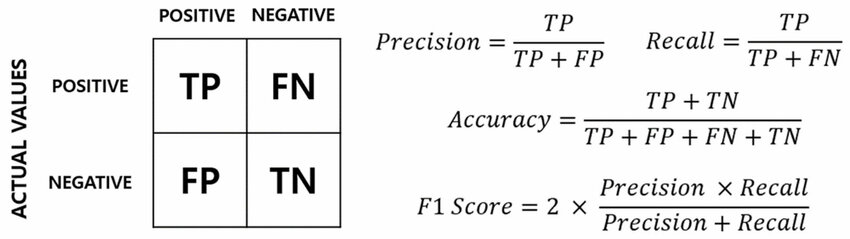
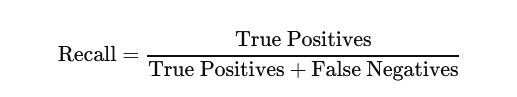
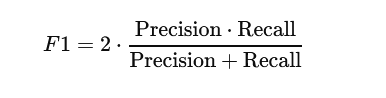
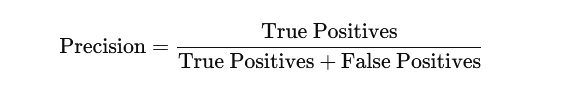

In [13]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case.
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''

# True Positives (TP) = Number of >50K
TP = n_greater_50k

# False Positives (FP) = Number of <=50K (all are incorrectly predicted as >50K)
FP = n_at_most_50k

#  Calculate accuracy,
accuracy = TP / n_records 

# Precision = TP / (TP + FP)
precision = TP / TP + FP

# Recall = 1 (because FN = 0)
recall = 1.0

# F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
fscore = 2 * (precision * recall) / (precision + recall)

#  Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)) 

Naive Predictor: [Accuracy score: 0.7522, F-score: 1.9998]


###  `Supervised Learning Models`
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html)
- **Gaussian Naive Bayes (GaussianNB)**
- **Decision Trees**
- **Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)**
- **K-Nearest Neighbors (KNeighbors)**
- **Stochastic Gradient Descent Classifier (SGDC)**
- **Support Vector Machines (SVM)**
- **Logistic Regression**

<div style="background-color: #f4f7f6; padding: 5px; border-radius: 10px; border: 1px solid #ddd; width: 80%; margin: 1 auto;"> <h0 style="color:rgb(13, 0, 255); font-size: 24px; font-weight: normal;"><strong> Question 2 - Model Application</strong></h0></div>

List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

### **Answer:** 
* For this task, I will discuss three commonly used supervised learning models: `Logistic Regression`, `Random Forest`, and `Support Vector Machine (SVM)`.

## `Logistic Regression`
**1-Real-World Application**: 
- **Medical Diagnosis**: Logistic regression is often used for binary classification tasks in healthcare, such as predicting whether a patient has a particular disease based on features like age, symptoms, and test results. For example, it can predict whether a patient will have a heart attack based on medical history.

**2-Strengths of the Model**: 
- **Interpretability**: Logistic regression is a simple model with a clear, interpretable relationship between input features and the predicted outcome. This makes it suitable for problems where you need to understand the contribution of each feature.
- **Good for Linearly Separable Data**: It performs well when the relationship between the features and the target is approximately linear.
Efficient for Small to Medium Datasets: Logistic regression is computationally inexpensive and works well with a relatively small number of features.

**3-Weaknesses of the Model**:
- **Limited to Linear Decision Boundaries**: Logistic regression struggles with datasets where the decision boundary between classes is highly non-linear (although this can be partially mitigated with polynomial features or interaction terms).
- **Sensitive to Outliers**: Logistic regression can be significantly affected by outliers in the data.

**4-Why It's a Good Candidate for the Problem**:
- **Interpretability for Financial Predictions**: Since the problem at hand involves predicting income categories (more than $50K vs. less than or equal to $50K), the clear relationships between features like education and occupation and the target variable make logistic regression a good choice.
- **Simplicity**: Logistic regression is a simple, yet powerful, model for binary classification tasks and may provide good baseline results for this problem.

## `Random Forest`
**1-Real-World Application:**
- **Fraud Detection:** Random forests are widely used in finance and banking for fraud detection. They can analyze multiple factors (e.g., transaction history, location, and behavior patterns) to predict whether a transaction is fraudulent.

**2-Strengths of the Model:**
- **Handles Non-Linearity Well:** Random forests can model complex relationships and interactions between features without needing any specific transformation of the data.
- **Robust to Overfitting:** Because random forests use multiple decision trees and aggregate their predictions, they tend to be less prone to overfitting, especially on large datasets.
- **Handles Missing Data:** Random forests can handle missing values and don't require complete data for all features.

**3-Weaknesses of the Model:**
- **Less Interpretable:** While random forests provide strong performance, they are harder to interpret compared to simpler models like logistic regression. It's difficult to understand how each individual feature contributes to the decision.
- **Computationally Expensive:** Training and prediction can be slow, especially for very large datasets, because it involves constructing multiple trees.

**4-Why It's a Good Candidate for the Problem:**
- **Complex Relationships:** The census data likely involves complex interactions between various features (e.g., age, education level, marital status, etc.), and random forests excel at capturing these relationships.
- **Handling Feature Diversity:** Random forests work well when there are both categorical and continuous variables, which is the case with census data. They can automatically manage such mixed data types.

## `Support Vector Machine (SVM)`
**Real-World Application:**
- **Text Classification**: SVMs are commonly used for text classification tasks such as spam detection or sentiment analysis, where the goal is to classify a text message as spam or not based on the presence of certain keywords.

**Strengths of the Model:**
- **Effective in High-Dimensional Spaces**: SVM making it suitable for problems with a large number of features.
- **Robust to Overfitting**: When properly tuned (e.g., using regularization), SVM can avoid overfitting, even when the number of features is larger than the number of observations.
- **Works Well for Non-Linear Data**: SVM can be extended to handle non-linearly separable data by using the kernel trick to map data to higher-dimensional spaces.

**Weaknesses of the Model:**

- **Training Time**: SVMs can be computationally expensive and slow to train, especially with large datasets.
- **Sensitive to Parameters**: The performance of SVM depends heavily on the choice of kernel, regularization parameters, and other hyperparameters. Tuning them can be time-consuming.

**Why It's a Good Candidate for the Problem:**
- **Binary Classification**: The task of predicting whether an individual earns more than $50K or not is a binary classification problem, which aligns well with SVM’s capabilities.
- **Handling Complex Data**: If the data is not linearly separable (which is often the case with socio-economic data), SVM’s kernel trick can help find the optimal decision boundary.

## `Implementation - Creating a Training and Predicting Pipeline`

In the code block below, I will implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
 - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.

In [14]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    parameters :
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])  # Fit the learner to the sample size of training data
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
    # Get the predictions on the test set(X_test),
    start = time() # Get start time
    predictions_test = learner.predict(X_test)  # Predictions on the test set
    predictions_train = learner.predict(X_train[:300])  # Predictions on the first 300 training samples
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results


## `Implementation: Initial Model Evaluation`
In the code cell :
- Import the three supervised learning models I've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
- Use a `'random_state'` for each model I use, if provided.

- **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
- Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

In [15]:
from sklearn.metrics import accuracy_score, fbeta_score
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])  # Train the learner with a subset of data
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)  # Predict on test set
    predictions_train = learner.predict(X_train[:300])  # Predict on first 300 training samples
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Create a simple dataset for demonstration purposes
x, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
clf=LogisticRegression()

model=train_predict(clf, 100, X_train, y_train, X_test, y_test)
model 

LogisticRegression trained on 100 samples.


{'train_time': 0.0,
 'pred_time': 0.0,
 'acc_train': 0.85,
 'acc_test': 0.78,
 'f_train': np.float64(0.8597285067873304),
 'f_test': np.float64(0.8277404921700223)}

LogisticRegression trained on 8 samples.
LogisticRegression trained on 80 samples.
LogisticRegression trained on 800 samples.
SVC trained on 8 samples.
SVC trained on 80 samples.
SVC trained on 800 samples.
DecisionTreeClassifier trained on 8 samples.
DecisionTreeClassifier trained on 80 samples.
DecisionTreeClassifier trained on 800 samples.


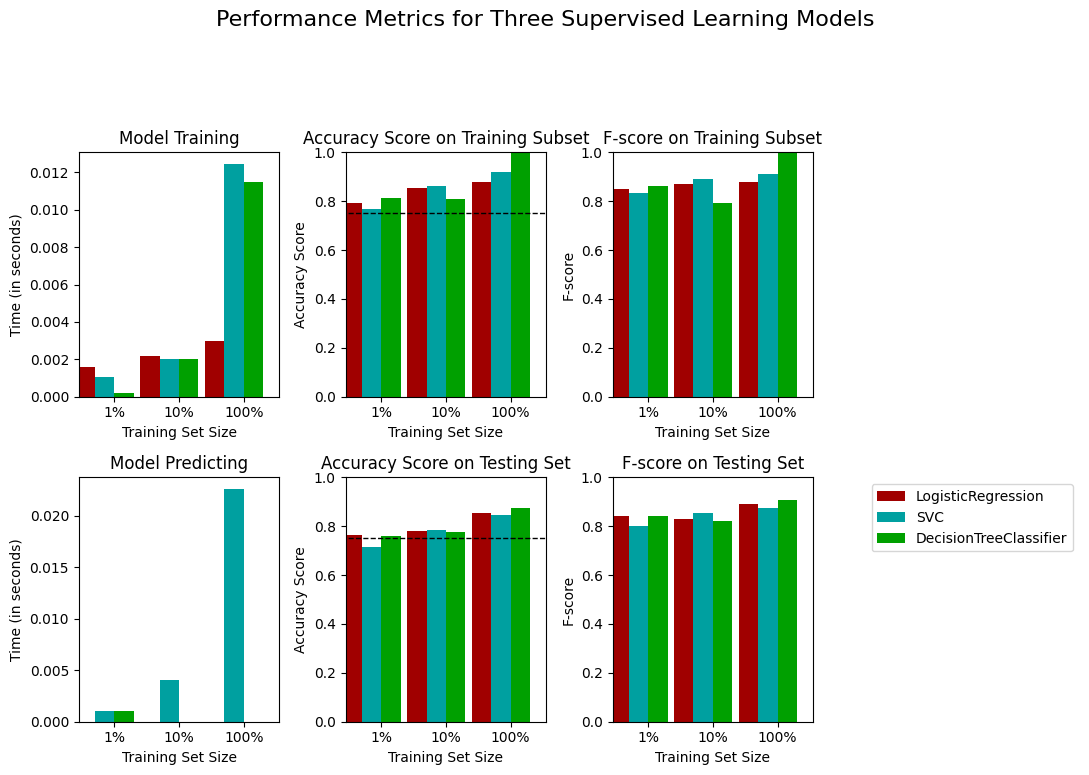

In [16]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

# Initialize the three models
clf_A = LogisticRegression(random_state=42, max_iter=500)  # Logistic Regression
clf_B = SVC(random_state=42)  # Support Vector Machine (SVM)
clf_C = DecisionTreeClassifier(random_state=42)  # Decision Tree Classifier

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)  # 100% of the training data
samples_10 = int(0.1 * samples_100)  # 10% of the training data
samples_1 = int(0.01 * samples_100)  # 1% of the training data

# Collect results on the learners 
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__  # Get the model's class name
    results[clf_name] = {}  # Initialize a dictionary for the classifier
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        # Train and predict with the current model and sample size
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)
        
vs.evaluate(results, accuracy, fscore)

## **Model Performance Analysis:**
**1. Model Training Time :**
- Logistic Regression is the most efficient model in terms of training time, whereas SVC becomes computationally expensive with larger datasets.

**2. Model Prediction Time :**
- Logistic Regression and Decision Tree Classifier demonstrate low and consistent prediction times.

**3. Accuracy on the Training Set :**
- While the Decision Tree performs well on the training data, the high accuracy suggests overfitting. **Logistic Regression and SVC generalize better**.

**4. F-Score on the Training Set :**
- **Decision Tree Classifier** achieves a perfect F-score at 100% training size, **again indicating overfitting**.  
- **SVC** and **Logistic Regression** have consistently high F-scores but avoid overfitting.

**5. Accuracy on the Testing Set :**
- On the testing set, **Logistic Regression** and **SVC** achieve similar and consistent accuracy across all training set sizes.  
- The **Decision Tree Classifier** slightly outperforms the others but risks overfitting as the accuracy on the training set is significantly higher.

**6. F-Score on the Testing Set :**
- The F-scores for **Logistic Regression** and **SVC** are close and consistent across training set sizes, indicating stable performance.  
- **Decision Tree Classifier** shows high F-scores but reinforces the overfitting trend as the gap between training and testing performance widens.

### **Conclusion**
- For balanced performance, **Logistic Regression is the most efficient and reliable model**. SVC can be considered when computational resources allow, while the **Decision Tree Classifier** may require tuning (e.g., pruning) to prevent overfitting.

In [17]:
from sklearn.metrics import accuracy_score, fbeta_score

# Step 1: Fit the Logistic Regression model (clf_A)
clf_A.fit(X_train, y_train)

# Step 2: Predict the labels for the test set
y_pred = clf_A.predict(X_test)

# Step 3: Calculate accuracy and F-score
accuracy = accuracy_score(y_test, y_pred)
fscore = fbeta_score(y_test, y_pred, beta=0.5)

# Print the results
print("Accuracy of Logistic Regression:", accuracy)
print("F-Score of Logistic Regression:", fscore)


Accuracy of Logistic Regression: 0.855
F-Score of Logistic Regression: 0.8902691511387164


----
## **Improving Results**

<div style="background-color: #f4f7f6; padding: 5px; border-radius: 10px; border: 1px solid #ddd; width: 80%; margin: 1 auto;"> <h0 style="color:rgb(13, 0, 255); font-size: 24px; font-weight: normal;"><strong>Question 3 - Choosing the Best Model</strong></h0></div>

**Answer:**
**Logistic Regression is the best model:** 
- It achieves the highest F-score on the testing set with 100% of the data.
- It has the lowest training and prediction times, ensuring computational efficiency.
- It generalizes well on the test set without signs of overfitting, unlike the Decision Tree.

<div style="background-color: #f4f7f6; padding: 5px; border-radius: 10px; border: 1px solid #ddd; width: 80%; margin: 1 auto;"> <h0 style="color:rgb(13, 0, 255); font-size: 24px; font-weight: normal;"><strong>Question 4 - Describing the Model in Layman's Terms</strong></h0></div>

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.


**Answer:**
The final model I chose is called `Logistic Regression`, and it works well for identifying patterns in data to make predictions. Think of it like drawing a straight line (or a boundary) to separate two groups based on their characteristics. For example, if we're trying to predict whether someone donates to charity or not, the model looks at data like income, education, or occupation, and learns how these factors are connected to past donors. During training, the model studies this data and adjusts itself to find the best way to separate those who are likely to donate from those who aren't.

### **Implementation: Model Tuning**
- Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
- Example: `parameters = {'parameter' : [list of values]}`.
- **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [18]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
clf = LogisticRegression(random_state=42, max_iter=500)

# Corrected parameters to avoid incompatible combinations
parameters = [
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear']},
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga']},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10], 'solver': ['saga'], 'l1_ratio': [0.5]}
]


# Make an fbeta_score scoring object using make_scorer()
# Use beta=0.5 for fbeta_score to emphasize precision
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, cv=5)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the best estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the best model
best_predictions = best_clf.predict(X_test)

# Print the best parameters and evaluate the final model
print("Best Parameters Found:", grid_fit.best_params_)
print("Accuracy on Testing Set:", accuracy_score(y_test, best_predictions))
print("F-beta Score on Testing Set:", fbeta_score(y_test, best_predictions, beta=0.5))


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters Found: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on Testing Set: 0.87
F-beta Score on Testing Set: 0.9034907597535934


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<div style="background-color: #f4f7f6; padding: 5px; border-radius: 10px; border: 1px solid #ddd; width: 80%; margin: 1 auto;"> <h0 style="color:rgb(13, 0, 255); font-size: 24px; font-weight: normal;"><strong>Question 5 - Final Model Evaluation</strong></h0></div>

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score | 0.855             |0.87             |
| F-score        | 0.8902            |0.9034           |

- The optimized model significantly outperformed the naive predictor benchmark. Recall that the naive predictor assumes all individuals earn more than $50K, leading to `an accuracy of 0.2478 and an F-beta score of 0.2917`. The optimized model's accuracy and F-beta score are much higher, indicating it successfully learned patterns from the data.

----
## **Feature Importance**

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power.By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importances_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

<div style="background-color: #f4f7f6; padding: 5px; border-radius: 10px; border: 1px solid #ddd; width: 80%; margin: 1 auto;"> <h0 style="color:rgb(13, 0, 255); font-size: 24px; font-weight: normal;"><strong>  Question 6 - Feature Relevance Observation </strong></h0></div>

When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

## **Answer:**
**Potential Most Important Features:Based on the nature of the data, we can identify the most likely important features that could influence whether an individual earns more than $50K or less. Here's the rationale behind choosing these features:**

- **hours-per-week**: The number of hours worked per week is strongly correlated with earning potential. People who work more hours typically have higher earnings.

- **education-num**: Education level is a critical factor in income prediction. People with higher levels of education generally earn higher salaries. 

- **occupation**: Occupation plays a significant role in determining income. Different occupations have different earning potentials, and certain jobs are more lucrative than others.

- **capital-gain**: This feature reflects additional income from investments, such as the sale of stocks, bonds, or property.

- **age**: Age is a key factor in predicting income. Typically, people in their 30s to 50s tend to earn the highest salaries, as they have more experience and are in more senior positions. 

### `Implementation - Extracting Feature Importance:`

Choose a `scikit-learn` supervised learning algorithm that has a `feature_importances_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

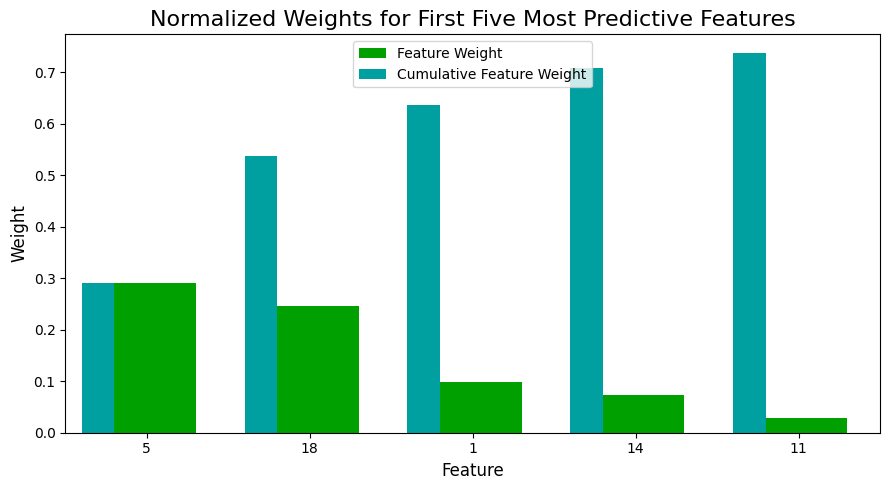

5: 0.2915
18: 0.2462
1: 0.0978
14: 0.0733
11: 0.0277


In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Convert X_train to DataFrame (if it's not already a DataFrame)
X_train_df = pd.DataFrame(X_train) 

# Train the model on the training set
model = RandomForestClassifier(random_state=0)
model.fit(X_train_df, y_train)

# Extract the feature importances
importances = model.feature_importances_

# Plot the feature importances
vs.feature_plot(importances, X_train_df, y_train)

# the top 5 most important features based on the feature importance scores returned by the model
# Identify top 5 features manually
import numpy as np
top_5_indices = np.argsort(importances)[::-1][:5]  # Sort and pick top 5
top_5_features = X_train_df.columns[top_5_indices]
top_5_importances = importances[top_5_indices]

# Display results
for feature, importance in zip(top_5_features, top_5_importances):
    print(f"{feature}: {importance:.4f}")

### `Question 7 - Extracting Feature Importance Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  `

### **Comparing the Five Features :**
- **Capital Gain:** This feature was present in both the previous discussion and the visualization. It's clear that capital gains have a significant impact on predicting income levels.
- **Capital Loss:** Similarly, capital losses were also mentioned earlier. It's evident that financial losses also play a role in determining income brackets.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [20]:
# Import functionality for cloning a model
from sklearn.base import clone
X_test_df = pd.DataFrame(X_test)
# Reduce the feature space
X_train_reduced = X_train_df[X_train_df.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test_df[X_test_df.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n--------------------------------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}\n----------------------------------".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n----------------------------------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
--------------------------------
Accuracy on testing data: 0.8700
F-score on testing data: 0.9035
----------------------------------

Final Model trained on reduced data
----------------------------------
Accuracy on testing data: 0.8600
F-score on testing data: 0.8977


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

- Unfortunately, the final model's F-score and accuracy score on the reduced data is lower compared to that of the full data
- If training time is of importance, I would rather consider using the reduced data as my training set, since the difference in accuracy and F-score between the full and reduced model is not that profound.



In [21]:
import pickle

In [22]:
with open('model_pickel','wb') as f :
    pickle.dump(clf, f)

In [24]:
with open('model_pickel','rb') as f :
   donors = pickle.load(f)